In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import warnings
if not sys.warnoptions:
     warnings.simplefilter("ignore")
    

In [131]:
data = pd.read_csv('iris.data.csv')
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [132]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
data.dropna(inplace=True)
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.datasets import load_iris
Iris= load_iris()

In [6]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
print(Iris['filename'])

iris.csv


In [8]:
Iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(Iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
print(Iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print(Iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
print(Iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
df = pd.DataFrame(Iris['data'], columns = Iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['target'] = Iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = Iris['data']
y = Iris['target']

In [16]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
type(Iris)


sklearn.utils._bunch.Bunch

In [19]:
Iris_df = pd.DataFrame(data = Iris['data'], columns = Iris['feature_names'])

In [20]:
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
Iris_df['Iris type'] = Iris['target']


In [22]:
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
Iris_df['Iris name'] = Iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [24]:
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


In [25]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [26]:
Iris_df['test'] = Iris_df['Iris type'].apply(f)

In [27]:
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name,test
0,5.1,3.5,1.4,0.2,0,sentosa,setosa
1,4.9,3.0,1.4,0.2,0,sentosa,setosa
2,4.7,3.2,1.3,0.2,0,sentosa,setosa
3,4.6,3.1,1.5,0.2,0,sentosa,setosa
4,5.0,3.6,1.4,0.2,0,sentosa,setosa


In [28]:
Iris_df.drop(['test'], axis =1, inplace = True)

In [29]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris type          150 non-null    int32  
 5   Iris name          150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [30]:
Iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
Iris_df.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      Iris type       \
                      count   mean  ...              75%  max     count mean   
Iris name                           ...                                        
sentosa                50.0  3.428  ...              0.3  0.6      50.0  0.0   
versicolor             50.0  2.770  ...              1.5  1.8      50.0  1.0   
virginica              50.0  2.974  ...              2.3  2.5      50.0  2.0   

                                          
            std  min  25%  50%  75%  max  
Iris name                                 
sentosa     0.0  0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  1.0  1.0  1.0  1.0  1.0  
virginica   0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

In [32]:
Iris_df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Iris type', 'Iris name'],
      dtype='object')

In [33]:
import seaborn as sns
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='Iris name',y= y2, data=Iris_df)

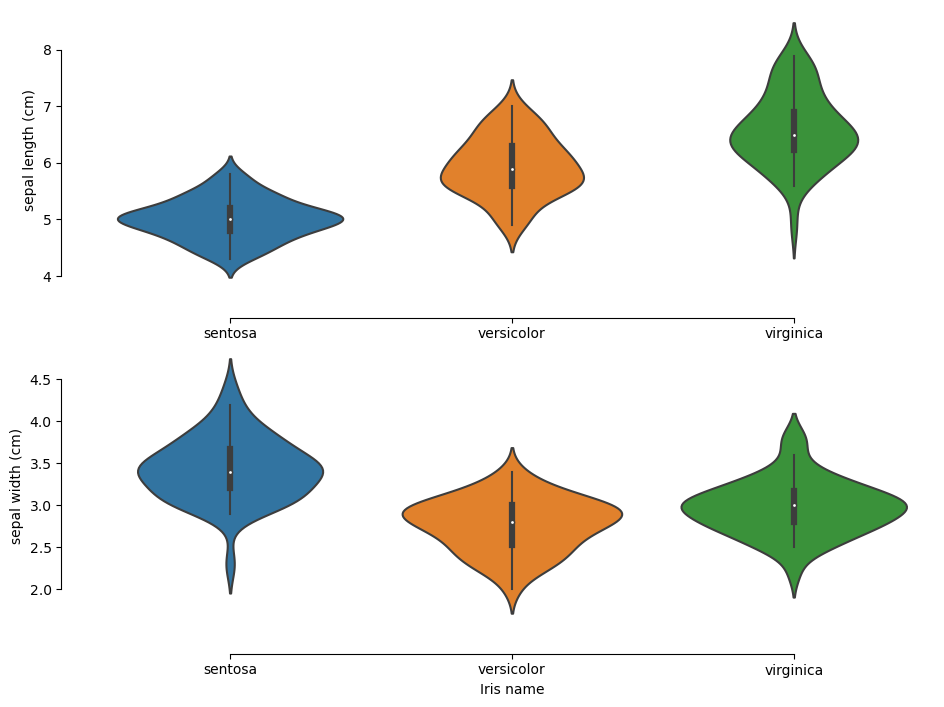

In [34]:
plt.figure(figsize=(24,8))
i =2
for measurement in Iris_df.columns[:-4]:
    plot_violin(measurement,i)
    sns.despine(offset=20, trim=True)
    i += 2

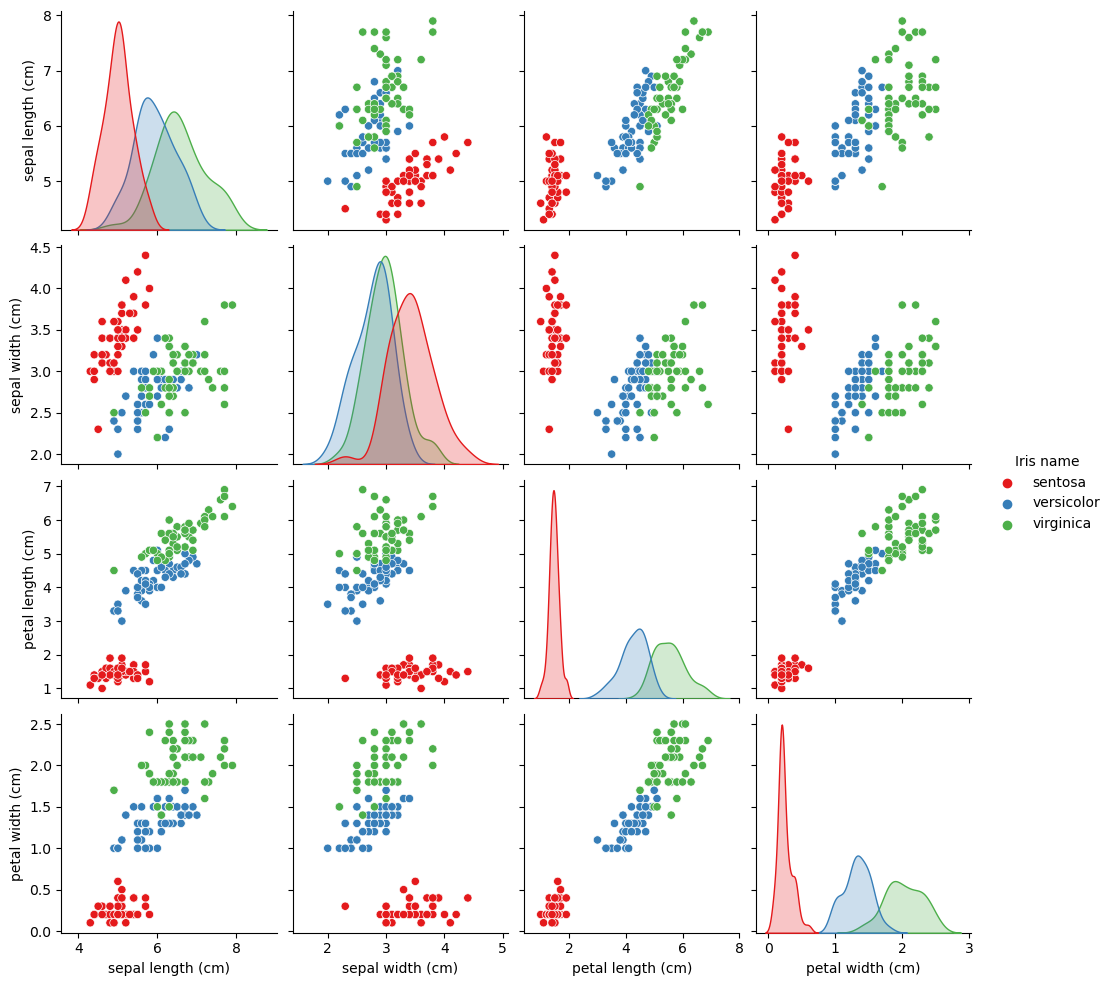

In [35]:

sns.pairplot(Iris_df, hue = 'Iris name', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1' );



In [36]:
Iris_df.iloc[:,:7].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Iris type,0.782561,-0.426658,0.949035,0.956547,1.000000


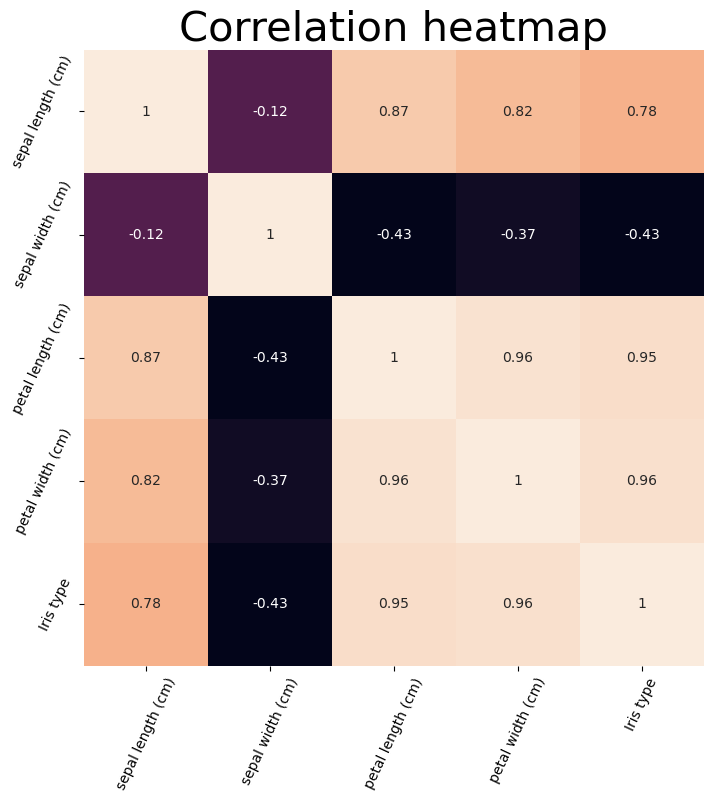

In [37]:
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(Iris_df.iloc[:,:5].corr(), annot = True, cbar=False)
axes.tick_params(labelrotation=65)
plt.title('Correlation heatmap', fontsize = 30);

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = Iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = Iris_df['Iris name']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred = knn.predict(X_test)

In [44]:
y_pred

array(['virginica', 'versicolor', 'sentosa', 'virginica', 'sentosa',
       'virginica', 'sentosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'sentosa', 'versicolor', 'versicolor', 'sentosa',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'sentosa',
       'virginica', 'sentosa', 'sentosa', 'versicolor', 'versicolor',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'virginica',
       'virginica', 'versicolor', 'sentosa', 'virginica'], dtype=object)

In [45]:
print(f'Our model accuracy with k=3 is: {knn.score(X_test, y_test)}')

Our model accuracy with k=3 is: 0.9736842105263158


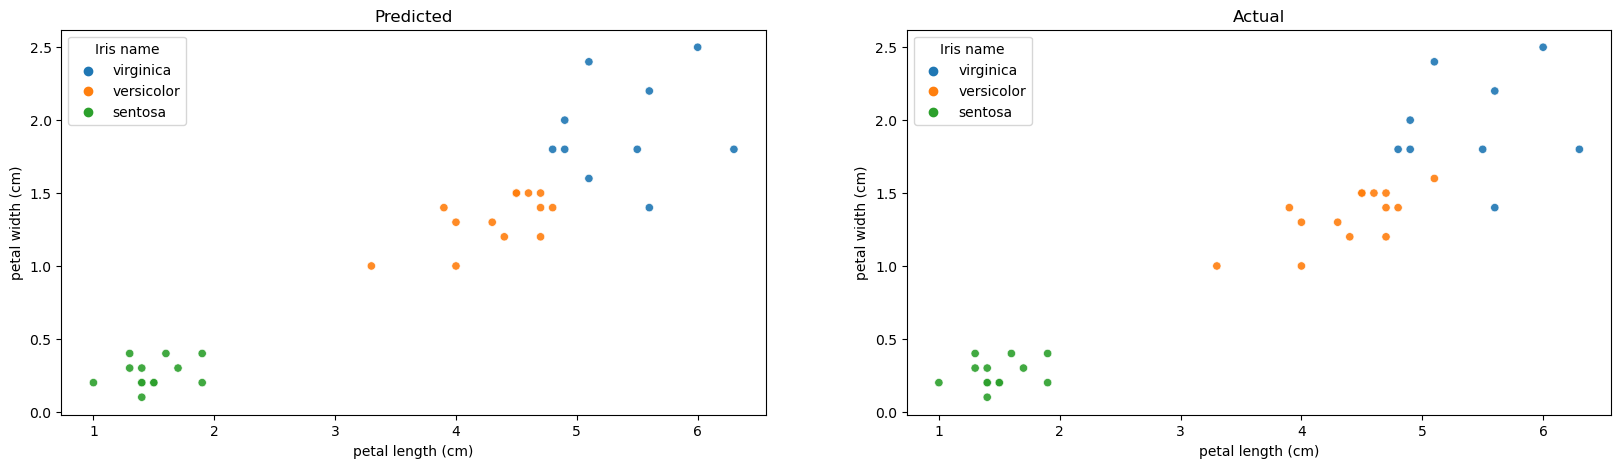

In [46]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.scatterplot(x = X_test['petal length (cm)'], y = X_test['petal width (cm)'], hue = y_pred, alpha = 0.9)
plt.title('Predicted')
plt.legend(title='Iris name')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot(x = X_test['petal length (cm)'], y = X_test['petal width (cm)'], hue = y_test, alpha = 0.9)
plt.title('Actual');

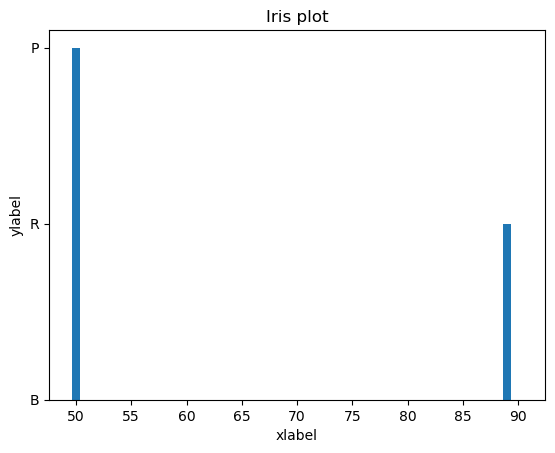

In [47]:
Iris={"B":90,"R":89,"P":50}
versicolor=list(Iris.keys())
virginica=list(Iris.values())
plt.bar(virginica,versicolor)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Iris plot")
plt.show()

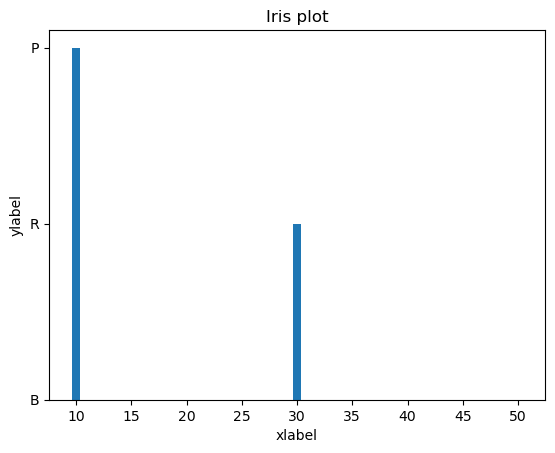

In [48]:
Iris={"B":50,"R":30,"P":10}
virginica=list(Iris.keys())
sentosa=list(Iris.values())
plt.bar(sentosa,virginica)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Iris plot")
plt.show()

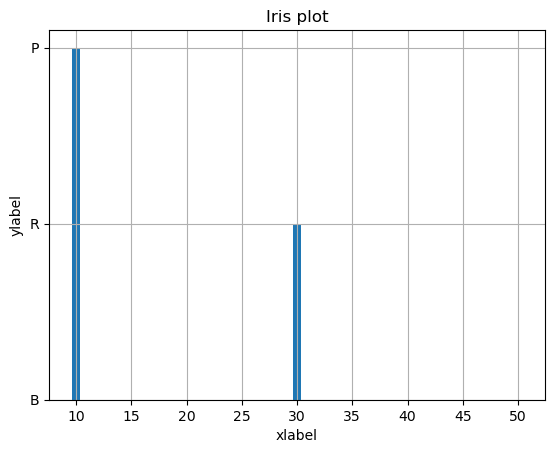

In [49]:
Iris={"B":50,"R":30,"P":10}
versicolor=list(Iris.keys())
virginica=list(Iris.values())
plt.bar(virginica,versicolor)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Iris plot")
plt.grid(True)
plt.show()

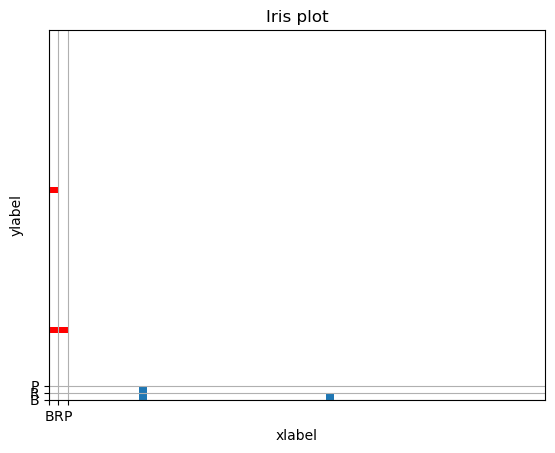

In [50]:
Iris={"B":50,"R":30,"P":10}
virginica=list(Iris.keys())
sentosa=list(Iris.values())
plt.bar(sentosa,virginica)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.barh(sentosa,virginica,color='r')
plt.title("Iris plot")
plt.grid(True)
plt.show()

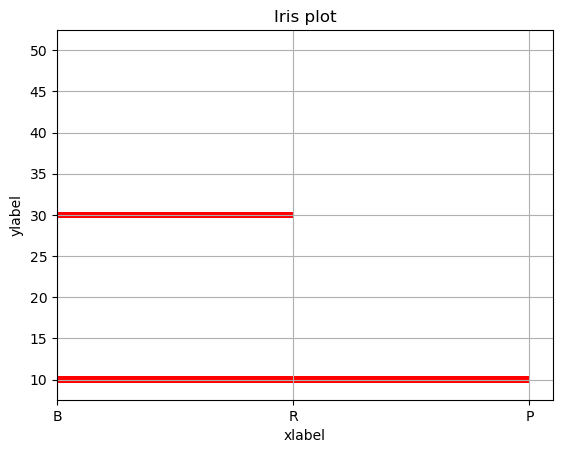

In [51]:
Iris={"B":50,"R":30,"P":10}
versicolor=list(Iris.keys())
virginica=list(Iris.values())
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.barh(virginica,versicolor,color='r')
plt.title("Iris plot")
plt.grid(True)
plt.show()

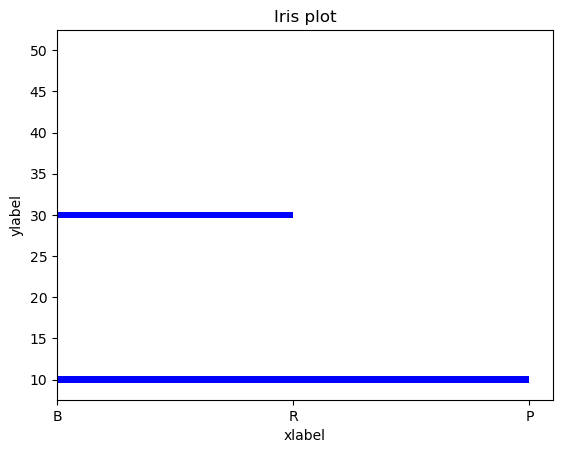

In [52]:
Iris={"B":50,"R":30,"P":10}
virginica=list(Iris.keys())
sentosa=list(Iris.values())
plt.barh(sentosa,virginica,color='b')
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Iris plot")
plt.show()

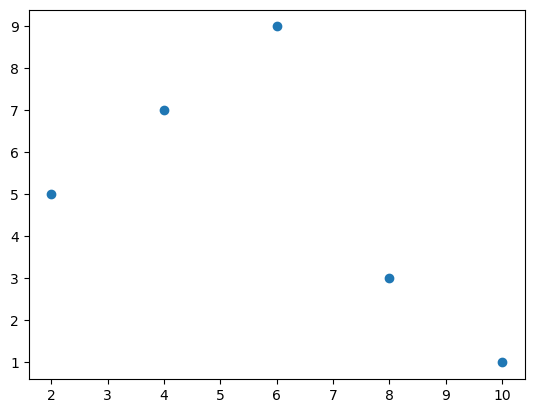

In [53]:
#scatorplt
x=[2,4,6,8,10]
y=[5,7,9,3,1]
plt.scatter(x,y)
plt.show()

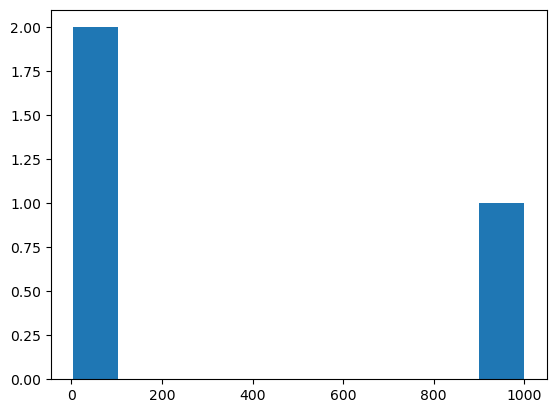

In [54]:
count=[1000,5.00,3.908]
plt.hist(count)
plt.show()


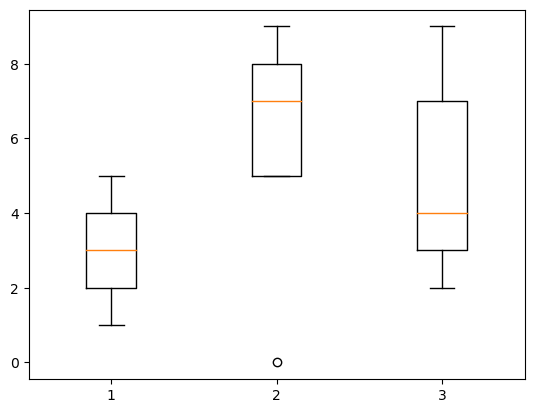

In [55]:
o=[1,2,3,4,5]
t=[5,7,8,9,0]
h=[7,9,2,3,4]
data=list([o,t,h])
plt.boxplot(data)
plt.show()

In [56]:
from sklearn.datasets import load_iris
Iris= load_iris()
x=Iris.data
y=Iris.target
feature_names=Iris.feature_names
target_names=Iris.target_names
print(feature_names,"\n")
print(target_names,"\n")
print(x[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

['setosa' 'versicolor' 'virginica'] 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [57]:
from sklearn.datasets import load_iris
Iris= load_iris()
x=Iris.data
y=Iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.4,random_state=1)
print(x_train.shape,"\n")
print(x_test.shape,"\n")
print(y_train.shape,"\n")
print(y_test.shape,"\n")

(90, 4) 

(60, 4) 

(90,) 

(60,) 



In [58]:
from sklearn.datasets import load_iris
Iris= load_iris()
x=Iris.data
y=Iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.5,random_state=1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Classifier_Knn=KNeighborsClassifier(n_neighbors =4)
Classifier_Knn.fit(x_train,y_train)
y_pred=Classifier_Knn.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))
sa=[[3,4,5,7],[6,7,8,9]]
pred=Classifier_Knn.predict(sa)
pred_species=[Iris.target_names[p] for p in pred]
print(pred_species)

0.92
['virginica', 'virginica']


In [59]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


SVM

In [60]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  #support vector classifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
iris=datasets.load_iris()
X=iris.data
Y=iris.target
print(x,'\n')
print(y,'\n')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [62]:
svm_classifer = SVC(kernel='linear')
svm_classifer.fit(X_train, Y_train)

SVC(kernel='linear')

In [63]:
y_pred = svm_classifer.predict(x_test)

In [64]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy:.3f}")
print(classification_report(y_test,y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

accuracy:1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        27

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]


# KNN using iris


In [65]:
from sklearn.neighbors import KNeighborsClassifier


In [66]:
Classifier_knn=KNeighborsClassifier(n_neighbors=5)

Classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

from sklearn import metrics
y_pred=Classifier_knn.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy",accuracy)

In [67]:
sam=[[5,6,3,2],[2,4,3,5]]
preds= Classifier_knn.predict(sam)
pred_species=[iris.target_names[p] for  p in preds]
print("prediction",pred_species)


prediction ['setosa', 'versicolor']


#DECISION TREE

In [68]:
print(iris.target_names)
print(iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [70]:
import pandas as pd
df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head(10)   

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [71]:
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [72]:
df.shape

(150, 5)

In [73]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [74]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [76]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<Axes: >

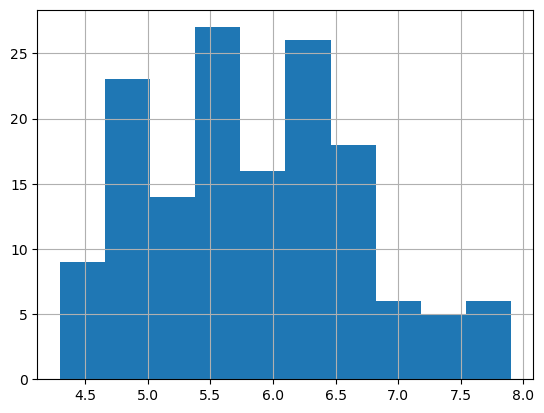

In [77]:
df['sepal length'].hist()

<Axes: >

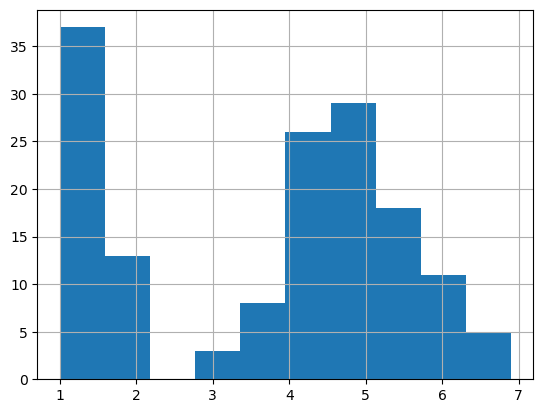

In [78]:
df['petal length'].hist()

<Axes: >

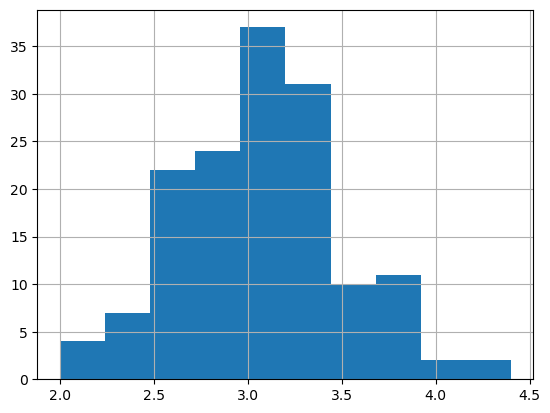

In [79]:
df['sepal width'].hist()

<Axes: >

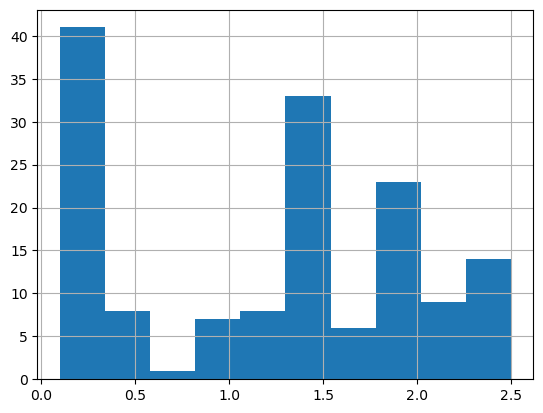

In [80]:
df['petal width'].hist()

In [81]:
colors = ['red','purple','orange']
species = ['setosa', 'virginica', 'versicolor']  

In [82]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
for i in range(150):
  if (df['species'][i] == 0):
      df['species'][i] = 'setosa'
  elif (df['species'][i] == 1):
      df['species'][i] = 'virginica'
  elif (df['species'][i] == 2):
      df['species'][i] = 'versicolor'
df['species']

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145    versicolor
146    versicolor
147    versicolor
148    versicolor
149    versicolor
Name: species, Length: 150, dtype: object

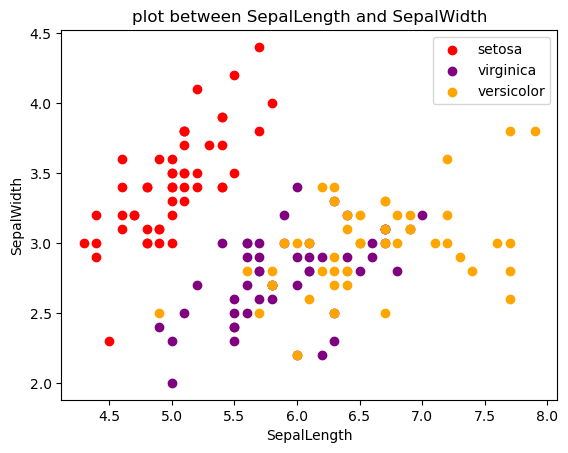

In [84]:
for i in range(3):
    x=df[df['species'] == species[i]]
    plt.scatter(x['sepal length'],x['sepal width'],c=colors[i],label = species[i])
plt.title('plot between SepalLength and SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

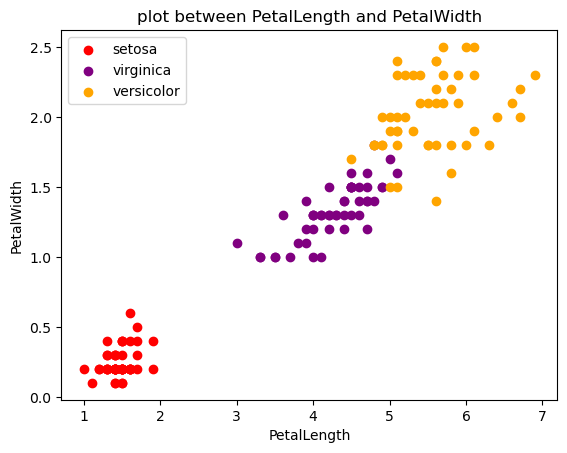

In [85]:
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['petal length'],x['petal width'],c=colors[i],label = species[i])
plt.title('plot between PetalLength and PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

# confussion matrix

In [86]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

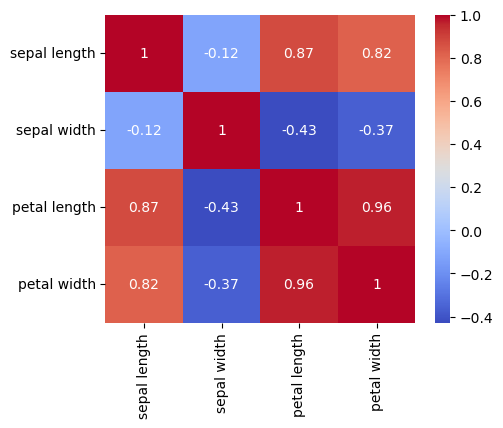

In [87]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot = True,ax=ax,cmap = 'coolwarm')

In [88]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [89]:
df['species'] = LE.fit_transform(df['species'])
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
from sklearn.model_selection import train_test_split
x= df.drop(columns=['species'])
y= df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
train_accuracy1 = knn.score(x_train,y_train)*100
print("Testing Accuracy of K Nearest Neighbors is:",train_accuracy1)

Testing Accuracy of K Nearest Neighbors is: 97.14285714285714


In [93]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,x,y,cv=5))

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [94]:
from sklearn.metrics import classification_report
pred= knn.predict(x_test)
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.92      0.89        13
           2       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [95]:
test_accuracy1 = accuracy_score(pred,y_test)*100
print("Testing Accuracy of K Nearest Neighbors is:",test_accuracy1)

Testing Accuracy of K Nearest Neighbors is: 93.33333333333333


In [96]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(x_train, y_train)

NearestNeighbors(n_neighbors=1)

In [97]:
A = neigh.kneighbors_graph(x_test)
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# decision tree

In [98]:
from sklearn.tree import DecisionTreeClassifier 
dt_model = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)  
dt_model.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [99]:
train_accuracy2 = dt_model.score(x_train,y_train)*100
print("Training Accuracy of Decision Tree is:",train_accuracy2)

Training Accuracy of Decision Tree is: 100.0


In [100]:
print(cross_val_score(dt_model,x,y,cv=5))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]


In [101]:
y_pred= dt_model.predict(x_test) 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      0.85      0.81        13
           2       0.88      0.83      0.86        18

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [102]:
test_accuracy2 = accuracy_score(y_pred,y_test)*100
print("Testing Accuracy of Decision Tree Accuracy is:",test_accuracy2)


Testing Accuracy of Decision Tree Accuracy is: 88.88888888888889


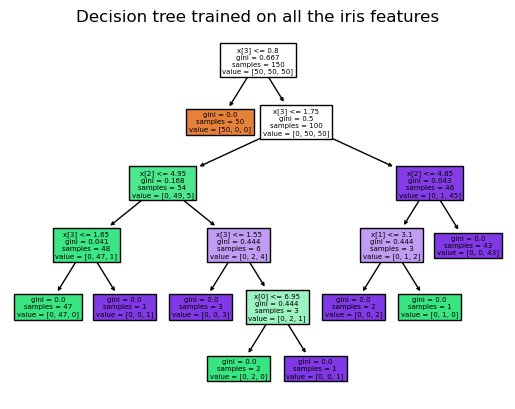

In [103]:
from sklearn.tree import plot_tree
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

# SVM

In [104]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
classifiers = SVC(kernel="linear",random_state =0)  
classifiers.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [105]:
print(cross_val_score(classifiers,x,y,cv=5))

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [106]:
train_accuracy3 = classifiers.score(x_train,y_train)*100
print("Training Accuracy of Decision Tree is:",train_accuracy3)

Training Accuracy of Decision Tree is: 98.21428571428571


In [107]:
y_predicted = classifiers.predict(x_test) 
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



In [108]:
test_accuracy3 = accuracy_score(y_predicted,y_test)*100
print("Testing accuracy of Support vector :",test_accuracy3)

Testing accuracy of Support vector : 97.36842105263158


In [109]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)
    h=0.2
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return 

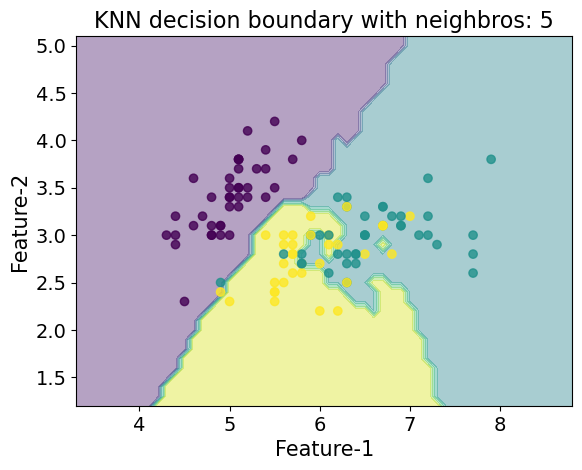

In [110]:
plt.figure()
plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
plot_decision_boundaries(x_train,y_train,KNeighborsClassifier,n_neighbors=5)
plt.show()

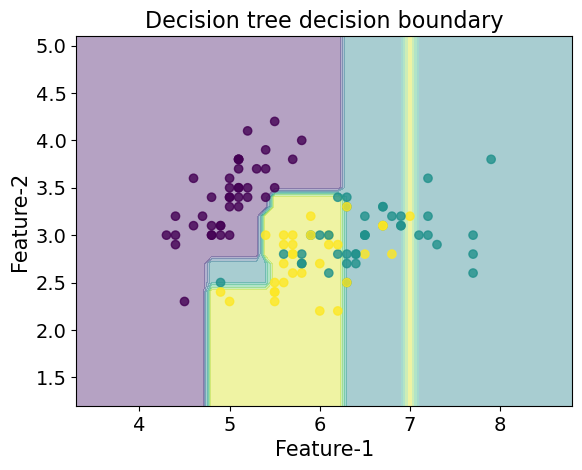

In [111]:
plt.figure()
plt.title("Decision tree decision boundary",fontsize=16)
plot_decision_boundaries(x_train,y_train,DecisionTreeClassifier,max_depth=4,criterion='gini', random_state=0) # gini, entropy
plt.show()

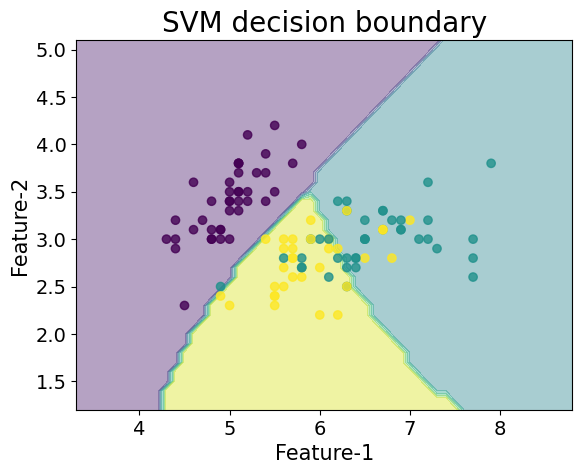

In [112]:
plt.figure()
plt.title("SVM decision boundary",fontsize=20)
plot_decision_boundaries(x_train,y_train,SVC,kernel="rbf",random_state =0) #kernel="rbf"
plt.show()

In [113]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [114]:

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [115]:
X, y = load_iris(return_X_y=True)
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

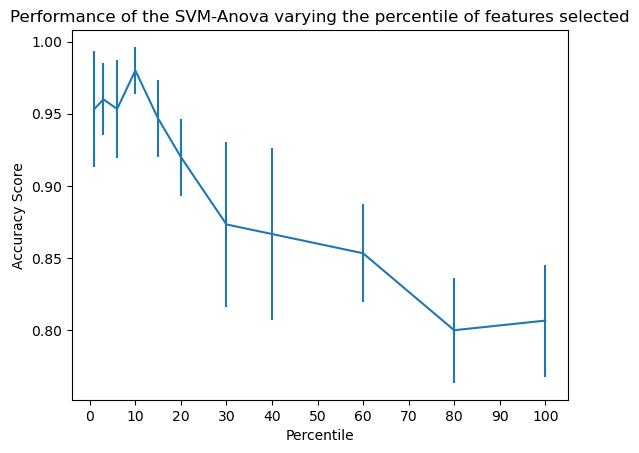

In [117]:
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

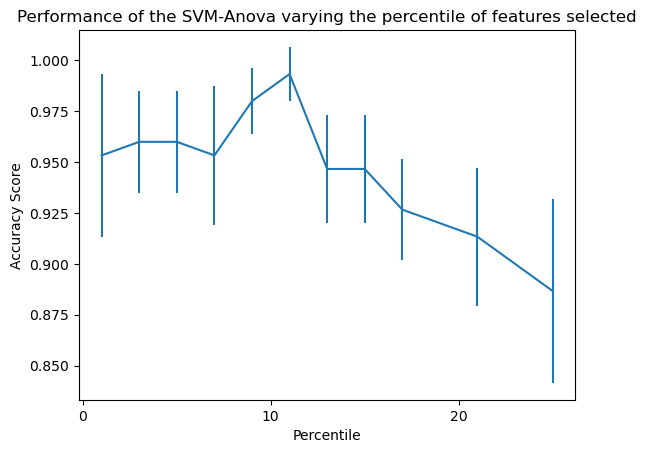

In [118]:
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 25)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

# pca (Principle component analysis)
# Dimensionality reduction

In [119]:
pca = PCA(n_components=2)
x_pca=pca.fit_transform(x)

# choose the number of cluster

In [120]:
no_cluster=3

# Iitialize KMeans Model:

In [121]:
Kmeans= KMeans(n_clusters=3)

# Fit the model to the data:

In [122]:
Kmeans.fit(x_pca)

KMeans(n_clusters=3)

# Get cluster assignments and cluster centers: 

In [123]:
labels = Kmeans.labels_
centers = Kmeans.cluster_centers_

# Visualize the result

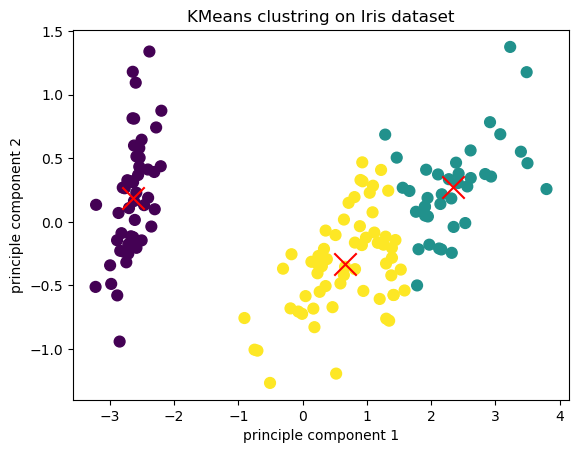

In [124]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,s=60,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='x',s=260)
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('KMeans clustring on Iris dataset')
plt.show()

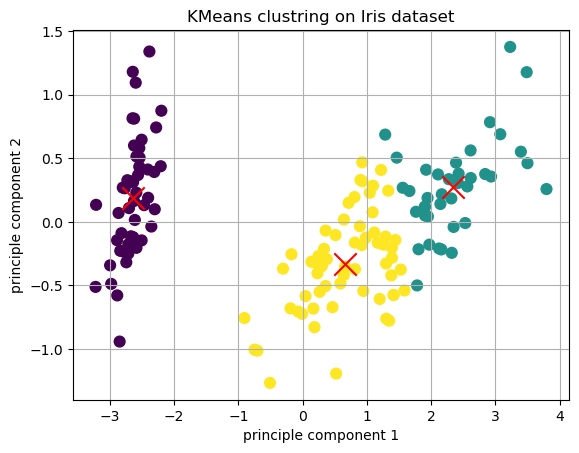

In [125]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,s=60,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='x',s=260)
plt.grid()
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('KMeans clustring on Iris dataset')
plt.show()